# **Sales Prediction**

### Source: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

## About dataset

* TV promotion budget (in million)




* Social Media promotion budget (in million)
* Radio promotion budget (in million)
* Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
* Sales (in million)

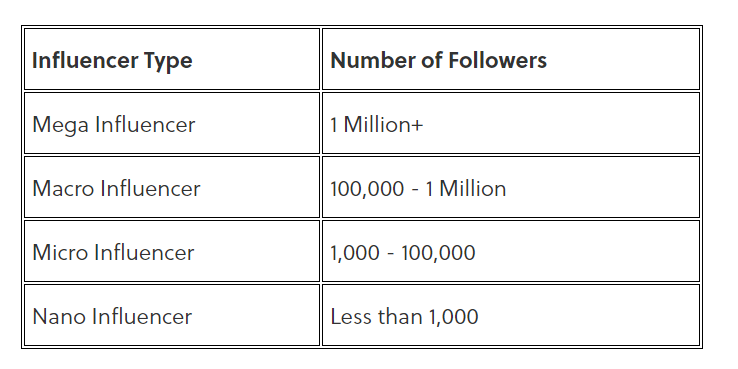

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Dummy Data HSS.csv')

# Display the first few rows of the DataFrame
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()  # Calculate the sum of duplicated rows in the DataFrame


0

In [ ]:
# we want to fill the missing data with its average, as follows:
df = df.fillna(df.mean()) # updates the df



<ipython-input-21-836518e038fd>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()) # updates the df


In [ ]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()  # Calculate the sum of missing values in each column


TypeError: DataFrame.isnull() missing 1 required positional argument: 'self'

In [ ]:
# see the updated df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   <class 'pandas.core.frame.DataFrame'>  1 non-null      uint8
dtypes: uint8(1)
memory usage: 129.0 bytes


In [ ]:
# we want to encode the categorical variable to data variables, as follows:
df = pd.get_dummies(df) # updates the df again

# see the updated df

df.head()


,<class 'pandas.core.frame.DataFrame'>
0,1


In [ ]:
df.shape

(4572, 8)

In [ ]:
df.columns # getting the column names

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [ ]:
df = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]

# see the updated df

df.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181


In [ ]:
# Get descriptive statistics for numerical columns in the DataFrame
df.describe()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.160356,3.323956,0.245407,0.253281,0.252187,0.249125,192.466602
std,26.096461,9.672723,2.211218,0.430375,0.434938,0.434316,0.432554,93.071947
min,10.000000,0.000684,0.000031,0.000000,0.000000,0.000000,0.000000,31.199409
25%,32.000000,10.546519,1.529879,0.000000,0.000000,0.000000,0.000000,112.397660
50%,53.000000,17.875181,3.057150,0.000000,0.000000,0.000000,0.000000,189.632530
75%,77.000000,25.647476,4.805832,0.000000,1.000000,1.000000,0.000000,272.414914
max,100.000000,48.871161,13.981662,1.000000,1.000000,1.000000,1.000000,364.079751


In [ ]:
df.corr()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
TV,1.000000,0.866885,0.527010,0.021335,-0.012630,-0.004863,-0.003645,0.996652
Radio,0.866885,1.000000,0.606793,0.009518,-0.005071,0.004212,-0.008601,0.867369
Social Media,0.527010,0.606793,1.000000,0.011631,0.013072,-0.013312,-0.011351,0.528121
Influencer_Macro,0.021335,0.009518,0.011631,1.000000,-0.332131,-0.331171,-0.328482,0.019267
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.332131,1.000000,-0.338211,-0.335465,-0.011701
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.331171,-0.338211,1.000000,-0.334495,-0.004099
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.328482,-0.335465,-0.334495,1.000000,-0.003289
Sales,0.996652,0.867369,0.528121,0.019267,-0.011701,-0.004099,-0.003289,1.000000


In [ ]:
# Drop the 'Sales' column from the DataFrame and convert the remaining columns to a NumPy array
X = df.drop(columns=['Sales']).to_numpy()

# Extract the 'Sales' column from the DataFrame and convert it to a NumPy array
y = df['Sales'].to_numpy()


## Scale data
$x_{scaled}=\dfrac{x-\mu}{x_{max} - x_{min}}=\dfrac{x-\bar{x}}{x_{max} - x_{min}}$


In [ ]:
def scale(x):
  x = (x - x.mean())/(max(x) - min(x))
  return x

In [ ]:
# Scale the first column of X and reshape it to a column vector
X1 = scale(X[:, 0]).reshape(-1, 1)
X2 = scale(X[:, 1]).reshape(-1, 1)
X3 = scale(X[:, 2]).reshape(-1, 1)
X4 = scale(X[:, 3]).reshape(-1, 1)
X5 = scale(X[:, 4]).reshape(-1, 1)
X6 = scale(X[:, 5]).reshape(-1, 1)
X7 = scale(X[:, 6]).reshape(-1, 1)

# Concatenate the scaled columns X1 and X2 to create the scaled feature matrix X_scaled
X_scaled = np.concatenate((X1, X2, X3, X4, X5, X6, X7), axis=1)

In [ ]:
X_scaled

array([[-0.42296507, -0.2372419 , -0.02975142, ...,  0.74671916,
        -0.25218723, -0.24912511],
       [-0.45629841, -0.18257631, -0.06539931, ...,  0.74671916,
        -0.25218723, -0.24912511],
       [-0.1451873 , -0.04652932, -0.02936324, ...,  0.74671916,
        -0.25218723, -0.24912511],
       ...,
       [-0.11185396,  0.03355229,  0.12675458, ..., -0.25328084,
         0.74781277, -0.24912511],
       [ 0.18814604, -0.01280355, -0.09892143, ..., -0.25328084,
        -0.25218723, -0.24912511],
       [-0.13407618, -0.04488739,  0.1232039 , ..., -0.25328084,
         0.74781277, -0.24912511]])

## Split data  into train 80% and test set 20%

In [ ]:
# Define the ratio for splitting data (80% for training, 20% for testing)
ratio = 0.8

# Calculate the number of rows for training data based on the ratio
rows = int(ratio * X.shape[0])

# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the scaled data X_scaled
np.random.shuffle(X_scaled)

# Split X_scaled into training and testing sets
X_train, X_test = X_scaled[:rows], X_scaled[rows:]


In [ ]:
ratio = 0.8
rows = int(ratio * y.shape[0])
np.random.seed(42)
np.random.shuffle(y)
y_train, y_test = y[:rows], y[rows:]

In [ ]:
X_train.shape, y_train.shape

((3657, 7), (3657,))

In [ ]:
X_train

array([[-0.31185396, -0.34667151, -0.14687216, ..., -0.25328084,
         0.74781277, -0.24912511],
       [ 0.08814604, -0.06569538, -0.21810799, ..., -0.25328084,
        -0.25218723, -0.24912511],
       [-0.27852063, -0.15925971, -0.23330414, ...,  0.74671916,
        -0.25218723, -0.24912511],
       ...,
       [-0.31185396, -0.3000415 , -0.11792877, ..., -0.25328084,
        -0.25218723, -0.24912511],
       [-0.4451873 , -0.2594991 , -0.07678758, ..., -0.25328084,
        -0.25218723, -0.24912511],
       [ 0.46592382,  0.12510651,  0.00946786, ..., -0.25328084,
         0.74781277, -0.24912511]])

# Hypothesis:
## Model
$$ y = \sum_{i=1}^{7} X_i w_i + b $$

$$ y = \mathbf{X} \cdot \mathbf{w} + b $$



In [ ]:
def predict(X, w, b):
    """
    Predicts the output based on the input features X, weights w, and bias b.

    Parameters:
    - X: Input feature matrix of shape (m, n), where m is the number of samples and n is the number of features.
    - w: Weight vector of shape (n, 1), representing the coefficients for each feature.
    - b: Bias scalar, representing the intercept term.

    Returns:
    - y: Predicted output vector of shape (m, 1), calculated as np.dot(X, w) + b.
    """
    y = np.dot(X, w) + b  # Calculate the predicted output using dot product and add bias
    return y


#cost function
$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)})^2 $$


In [ ]:
def cost_func(X, y, w, b):
    m = X.shape[0]  # Number of samples
    error = predict(X, w, b) - y  # Compute the error between predicted and actual values
    cost = np.sum(error**2) / (2 * m)  # Calculate the mean squared error and divide by 2m
    return cost

# Gradiant
#### Derivative term: The partial derivative of the cost function
$$ \frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$
$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^{(i)}) - y^{(i)}) $$


In [ ]:
def grad(X, y, w, b):
    m, n = X.shape

    dw = np.zeros(n)
    db = 0

    for i in range(m):
        error = predict(X[i], w, b) - y[i]
        dw += error * X[i]
        db += error


    dw /= m
    db /= m

    return dw, db

# Initial condition

In [ ]:
lr = 0.1  # Learning rate
w = np.zeros(X_train.shape[1])  # Initialize weights to zeros
b = 0  # Initialize bias to 0
epochs = 20009  # Number of epochs
cost = []  # List to store cost values

for i in range(epochs):
    # Calculate gradients
    dw, db = grad(X_train, y_train, w, b)

    # Update weights and bias using gradient descent
    w -= lr * dw
    b -= lr * db

    # Calculate cost and append to cost list
    cost_val = cost_func(X_train, y_train, w, b)
    cost.append(cost_val)

    if i % 100 == 0:  # Print cost every 50 iterations
        print(f'Iteration: {i}, Cost: {cost_val}')

print('\nTraining complete.')
print(f'Final weights: {w}')
print(f'Final bias: {b}')
print(f'Final cost: {cost_val}')

Iteration: 0, Cost: 19287.374728537012
Iteration: 100, Cost: 489.1247022339904
Iteration: 200, Cost: 165.5167234939574
Iteration: 300, Cost: 119.54877417144941
Iteration: 400, Cost: 100.39131314915429
Iteration: 500, Cost: 87.00203548029221
Iteration: 600, Cost: 76.78037693693565
Iteration: 700, Cost: 68.83274962881923
Iteration: 800, Cost: 62.58454990638413
Iteration: 900, Cost: 57.62017499865611
Iteration: 1000, Cost: 53.63380781083095
Iteration: 1100, Cost: 50.39906857067355
Iteration: 1200, Cost: 47.74747082088361
Iteration: 1300, Cost: 45.5528526777614
Iteration: 1400, Cost: 43.720092231783134
Iteration: 1500, Cost: 42.176915137545805
Iteration: 1600, Cost: 40.86793691327737
Iteration: 1700, Cost: 39.7503215479219
Iteration: 1800, Cost: 38.790610187835
Iteration: 1900, Cost: 37.962397783995534
Iteration: 2000, Cost: 37.24462506430838
Iteration: 2100, Cost: 36.62031772702821
Iteration: 2200, Cost: 36.07565129931178
Iteration: 2300, Cost: 35.599253690593684
Iteration: 2400, Cost: 35

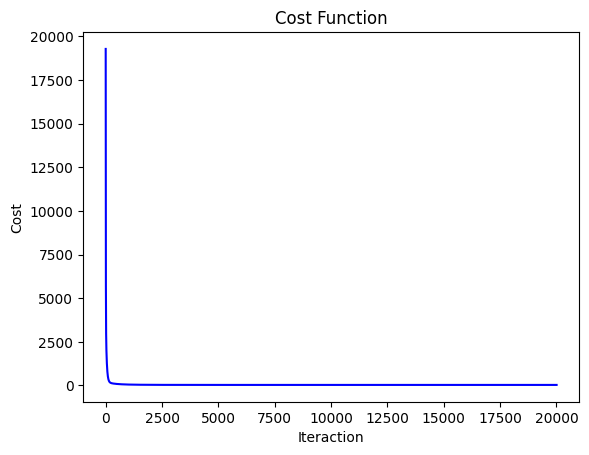

In [ ]:
plt.plot(range(epochs), cost, color='b')
plt.title('Cost Function')
plt.xlabel('Iteraction')
plt.ylabel('Cost')
plt.show()

In [ ]:
y_head = predict(X_train, w, b)

# Evaluation

In [ ]:
y_predict = predict(X_train, w, b)

# Assuming you have defined the predict function and have X_train, w, b, and y_train already defined

# Calculate predicted values using the predict function
y_predict = predict(X_train, w, b)

# Calculate the absolute differences using list comprehension
differences = [abs(y_train[i] - y_predict[i]) for i in range(len(y_train))]

# Print the actual value, predicted value, and difference for each data point
for actual, predicted, difference in zip(y_train, y_predict, differences):
    print(f'Actual value: {actual} VS Predicted Value: {predicted} - Difference: {difference}')


Actual value: 90.05422241 VS Predicted Value: 91.48925739211109 - Difference: 1.435034982111091
Actual value: 222.741668 VS Predicted Value: 219.33837400230917 - Difference: 3.403293997690838
Actual value: 102.7747905 VS Predicted Value: 103.49674953304411 - Difference: 0.721959033044115
Actual value: 328.2393781 VS Predicted Value: 326.7472499987849 - Difference: 1.492128101215087
Actual value: 351.8073281 VS Predicted Value: 353.0150378738932 - Difference: 1.2077097738932139
Actual value: 261.9668123 VS Predicted Value: 263.4485490163765 - Difference: 1.4817367163764743
Actual value: 349.8615752 VS Predicted Value: 353.00250388600284 - Difference: 3.1409286860028374
Actual value: 140.4152859 VS Predicted Value: 138.50889696543854 - Difference: 1.9063889345614484
Actual value: 264.5922333 VS Predicted Value: 264.0804902323223 - Difference: 0.5117430676776848
Actual value: 55.67421374 VS Predicted Value: 53.40716815800775 - Difference: 2.2670455819922495
Actual value: 138.1027677 VS Pr



## **Model Evaluation**
Calculate Residual Sum of Squares (SSR):


$R^2 = 1 - \dfrac{SSR}{SST}$

where  $SSR = \sum\limits_{i=1}^m (y_i - y_{pred_i})^2$

$SST  = \sum\limits_{i=1}^m (y_i - \bar{y}_{\text{train}})^2$





In [ ]:
def r2_score(y_train, y_pred):
 SSR = np.sum((y_train - y_pred)**2)
 SST = np.sum((y_train - y_train.mean())**2)
 r2 = 1 - SSR/SST
 return r2

In [ ]:
r2 = r2_score(y_train, y_head)
print(f' R2 Score : {r2}')

 R2 Score : 0.9926608591546793


In [ ]:
y_predict = predict(X_test, w, b )
for i in range(len(y_test)):

    print(f'Actual value : {y_test[i]} VS Predicted Value : {y_predict[i]}')

Actual value : 185.5518229 VS Predicted Value : 180.55665511640365
Actual value : 311.1146946 VS Predicted Value : 314.5307599159218
Actual value : 218.5678072 VS Predicted Value : 216.88301341713935
Actual value : 348.1096475 VS Predicted Value : 344.785392501483
Actual value : 291.3240319 VS Predicted Value : 292.0468130409363
Actual value : 90.19350726 VS Predicted Value : 88.25833734496048
Actual value : 88.96782897 VS Predicted Value : 93.20656451376988
Actual value : 84.62406262 VS Predicted Value : 75.55130030549029
Actual value : 147.3946664 VS Predicted Value : 146.03866525085658
Actual value : 136.7709591 VS Predicted Value : 135.21317146616497
Actual value : 256.6607986 VS Predicted Value : 254.29785024494794
Actual value : 109.4019308 VS Predicted Value : 109.7956220354977
Actual value : 196.5945084 VS Predicted Value : 198.44105450644673
Actual value : 54.51656478 VS Predicted Value : 50.3300911604594
Actual value : 182.9860143 VS Predicted Value : 184.81212354926703
Actua

#**Sci-Kit learn**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Dummy Data HSS.csv')


In [ ]:
df = df.fillna(df.mean()) # updates the df

# see the updated df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


<ipython-input-31-f43292e17b96>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()) # updates the df


In [ ]:
df = pd.get_dummies(df) # updates the df again

# see the updated df

df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


In [ ]:
# Drop the 'Marks' column from the DataFrame and convert the remaining columns to a NumPy array
X = df.drop(columns=['Sales']).to_numpy()

# Extract the 'Marks' column from the DataFrame and convert it to a NumPy array
y = df['Sales'].to_numpy()


In [ ]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [ ]:
 #Splitting the data into training and testing sets
# X_scale: scaled input features, y: target variable
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: setting the random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train) # Fitting the model to the training data

LinearRegression()

In [ ]:
# Predicting the target variable for the training data
y_head = model.predict(X_train)

r2 = r2_score(y_train, y_head)
mse = mean_squared_error(y_train, y_head) # Calculating Mean Squared Error
print(f'r2 score : {r2}, mse : {mse}')

r2 score : 0.9935906871996726, mse : 56.003741798731205


In [ ]:
y.mean()

192.46660210662066